# Predictive Analysis

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading File

In [5]:
df = pd.read_csv(r"E:\E commerce project\Cleaned_Ecommerce_Data _working.csv")

# KEY DRIVERS of Customers Satisfaction:

In [8]:
# Satisfaction by Income Level

C:\Users\HP\AppData\Local\Temp\ipykernel_192\2726252612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_satisfaction.index, y=income_satisfaction.values, palette='coolwarm')


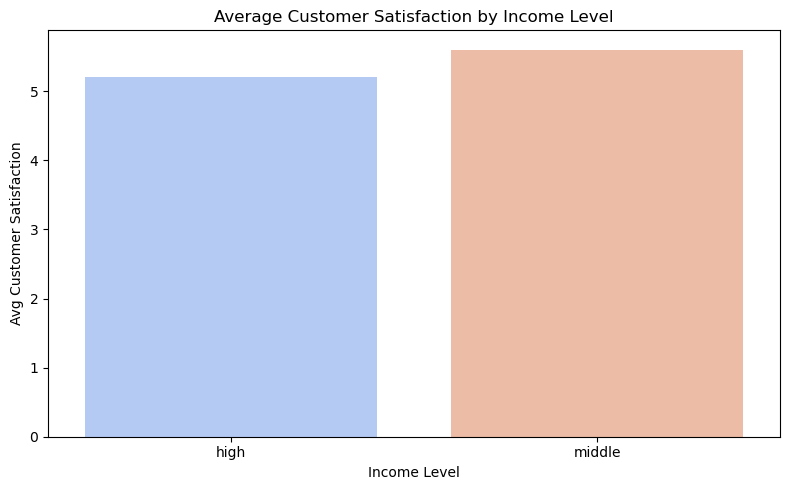

In [10]:
# Ensuring Customer_Satisfaction is numeric
df['Customer_Satisfaction'] = pd.to_numeric(df['Customer_Satisfaction'], errors='coerce')

# Grouped by Income Level and calculated average Customer Satisfaction
income_satisfaction = df.groupby('Income_Level')['Customer_Satisfaction'].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=income_satisfaction.index, y=income_satisfaction.values, palette='coolwarm')
plt.title('Average Customer Satisfaction by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Avg Customer Satisfaction')
plt.tight_layout()
plt.show()

In [12]:
# Customers in the middle-income group have higher average satisfaction.
# High-income customers are less satisfied on average.

In [15]:
# Satisfaction by Device Used

C:\Users\HP\AppData\Local\Temp\ipykernel_192\1629214693.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_satisfaction.index, y=device_satisfaction.values, palette='pastel')


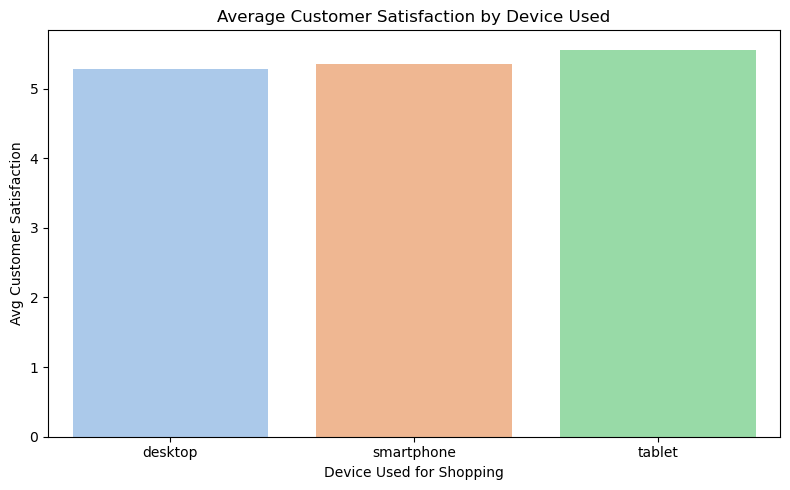

In [17]:
# Ensuring Customer_Satisfaction is numeric
df['Customer_Satisfaction'] = pd.to_numeric(df['Customer_Satisfaction'], errors='coerce')

# Grouped by Device Used and calculated average satisfaction
device_satisfaction = df.groupby('Device_Used_For_Shopping')['Customer_Satisfaction'].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=device_satisfaction.index, y=device_satisfaction.values, palette='pastel')
plt.title('Average Customer Satisfaction by Device Used')
plt.xlabel('Device Used for Shopping')
plt.ylabel('Avg Customer Satisfaction')
plt.tight_layout()
plt.show()

In [19]:
# Smartphone users and desktop users have similar satisfaction, but slightly lower than tablet users.

In [22]:
# Satisfaction by Purchase Channel( in store, mixed, Online)

C:\Users\HP\AppData\Local\Temp\ipykernel_192\1566081410.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_satisfaction.index, y=channel_satisfaction.values, palette='YlGnBu')


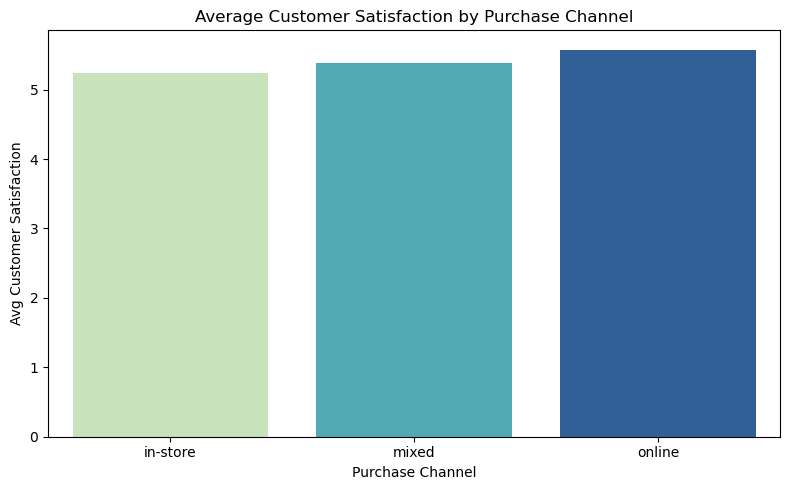

In [24]:

# Ensure Customer_Satisfaction is numeric
df['Customer_Satisfaction'] = pd.to_numeric(df['Customer_Satisfaction'], errors='coerce')

# Grouped by Purchase Channel and calculated average satisfaction
channel_satisfaction = df.groupby('Purchase_Channel')['Customer_Satisfaction'].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=channel_satisfaction.index, y=channel_satisfaction.values, palette='YlGnBu')
plt.title('Average Customer Satisfaction by Purchase Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Avg Customer Satisfaction')
plt.tight_layout()
plt.show()

In [26]:
# Online channel users have the highest satisfaction.
# In-store customers are least satisfied.
# Mixed channel (those using both online & offline) fall in between.

# Analyzing Time Spent on Product Research and customer satisfaction

In [ ]:
# Scatterplot to see relationships

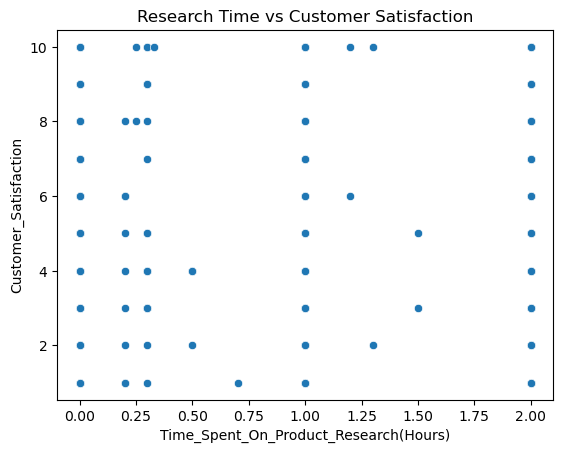

In [36]:
sns.scatterplot(data=df, x='Time_Spent_On_Product_Research(Hours)', y='Customer_Satisfaction')
plt.title('Research Time vs Customer Satisfaction')
plt.show()

In [38]:
# There is no relationship between Time_Spent_On_Product_Research and Customer_Satisfaction.
# Satisfaction scores are spread across all research times, from 0 to 2 hours.
# High satisfaction (8–10) and low satisfaction (1–3) occur regardless of research time.


# Aanalyzing Time Spent on Product Research and return rate

In [42]:
# Scatterplot to see relationships

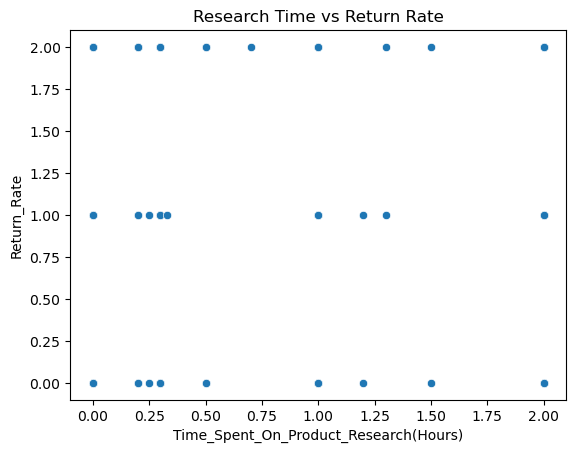

In [44]:
sns.scatterplot(data=df, x='Time_Spent_On_Product_Research(Hours)', y='Return_Rate')
plt.title('Research Time vs Return Rate')
plt.show()

In [46]:
# Return rates (0, 1, 2) are evenly scattered across all levels of research time.
# No downward or upward trend is visible.

# Correlation check

In [53]:

print("Correlation with Satisfaction:", df['Time_Spent_On_Product_Research(Hours)'].corr(df['Customer_Satisfaction']))
print("Correlation with Return Rate:", df['Time_Spent_On_Product_Research(Hours)'].corr(df['Return_Rate']))

Correlation with Satisfaction: 0.008175943106822575
Correlation with Return Rate: 0.015679282397321564


In [55]:
# correlations are close to zero, so no impact.

# Customers spending more time don't necessarily feel more satisfied.
# They also don't return products significantly less than those who spend less time.

# Identifying the product categories where discounts have the strongest impact on how much people spend

In [29]:
# Compare average purchase amount in each category 

#  with discount used
#vs. without discount

# Ensuring data types are correct
df['Discount_Used'] = df['Discount_Used'].astype(bool)
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')

# Grouped by Purchase Category and Discount Usage
category_discount_comparison = (
    df.groupby(['Purchase_Category', 'Discount_Used'])['Purchase_Amount']
    .mean()
    .unstack()
    .rename(columns={False: 'No Discount', True: 'With Discount'})
)


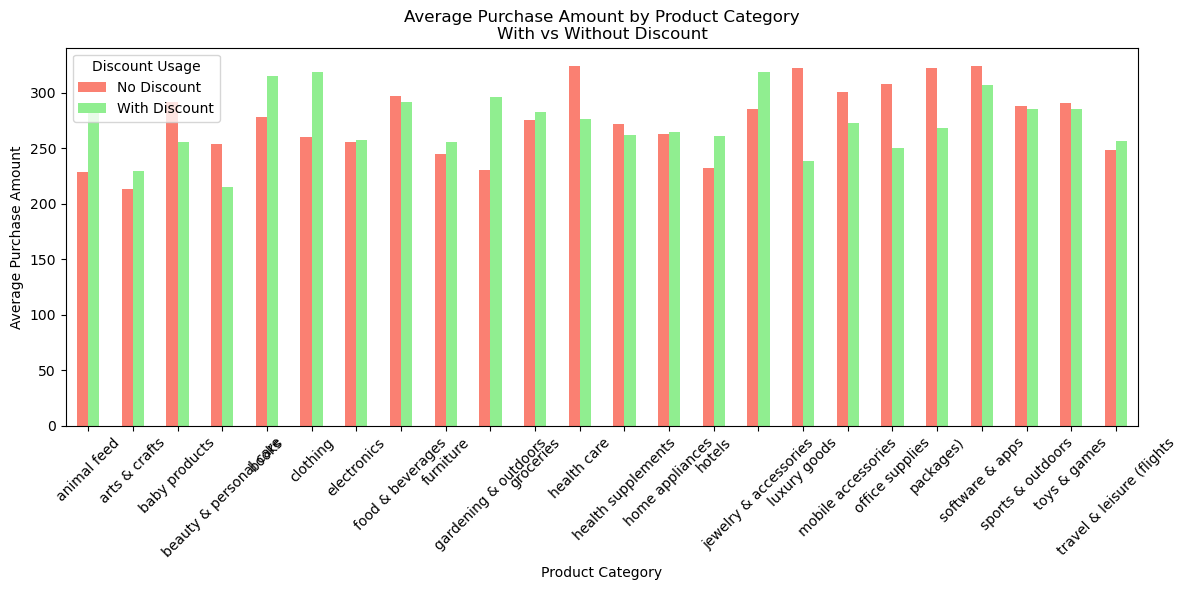

In [31]:
# Plot
category_discount_comparison.plot(kind='bar', figsize=(12,6), color=['salmon', 'lightgreen'])
plt.title('Average Purchase Amount by Product Category\nWith vs Without Discount')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Discount Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Red Bars = No Discount
# Green Bars = With Discount